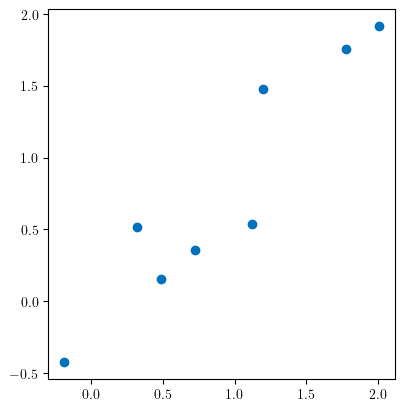

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
colors = ["#0072BD","#D95319","#EDB120","#7E2F8E","#77AC30","#4DBEEE","#A2142F"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

n = 8

rng = np.random.default_rng(12+12+12+123)
x = rng.normal(1, 1, n)
y = x + rng.normal(0, .2, n)

# sort points
idx = np.argsort(x)
x = x[idx]
y = y[idx]

# modify points
y[2] -= .1
ii = int(n/2)
y[ii] -= .5

# precompute statistics
x1 = x.min()
x2 = x.max()
xbar = x.mean()
ybar = y.mean()
covxy = np.sum((x-xbar)*(y-ybar)) / (n-1)
varx = np.var(x)
spec = np.linalg.eigvals(np.cov(x,y))
lmax = spec.max()
lmin = spec.min()

# plot scatter
ax = plt.axes()
ax.set_aspect('equal')
plt.scatter(x,y)
plt.show()

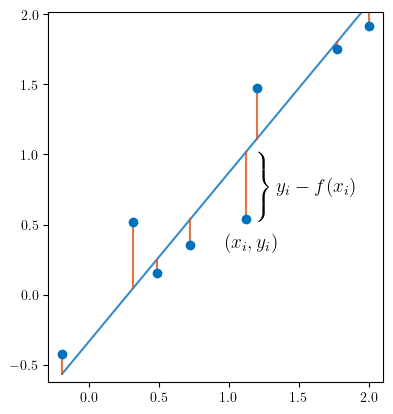

In [2]:
# linear regression model
f = lambda xi : covxy / varx * (xi - xbar) + ybar

ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim([x.min() -.1, x.max() + .1])
ax.set_ylim([y.min() -.2, y.max() + .1])
ax.scatter(x, y, zorder=3)
# plot regression line
ax.plot([x1, x2], [f(x1), f(x2)], color=colors[0], alpha=.8)
# plot residuals
for xi, yi in zip(x,y):
    ax.plot([xi, xi], [yi, f(xi)], color=colors[1], alpha=.8)

ax.annotate(r'$\left.\rule{0pt}{2.2em}\right\} y_i - f(x_i)$',
            fontsize=14,
            xy = (x[ii]+.09,-.04 + (y[ii]+f(x[ii]))/2))
ax.annotate('$(x_i, y_i)$', fontsize=14, xy = (x[ii]-.15,y[ii]-.2))
plt.savefig("fig-least-squares.pdf", bbox_inches='tight')

plt.show()

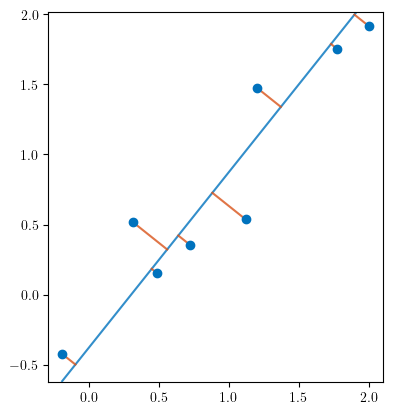

In [3]:
m = (lmax - varx) / covxy
g = lambda xi : m * (xi - xbar) + ybar

ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim([x.min() -.1, x.max() + .1])
ax.set_ylim([y.min() -.2, y.max() + .1])
ax.scatter(x, y, zorder=3)
ax.plot([x1, x2], [g(x1), g(x2)], alpha=.8)
for xi, yi in zip(x,y):
    x0 = (xi + m * (m * xbar + yi - ybar)) / (m**2 + 1)
    ax.plot([xi, x0], [yi, g(x0)], color=colors[1], alpha=.8)

plt.savefig("fig-pca-fit.pdf", bbox_inches='tight')

plt.show()